In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 47.5 MB/s 


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

#코랩의 플랫폼이 뭔지 몰랐던 탓에 몇일을 해맸다.

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re
#from wordcloud import WordCloud

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import os
path ="/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/"
target_list=os.listdir(path)
target_list

['아로나민골드, 그 외_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '아로나민골드, 그 외_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '아로나민골드, 그 외_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180301_20180331 (5).x

In [ ]:
target_list

['아로나민골드, 그 외_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '아로나민골드, 그 외_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '아로나민골드, 그 외_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180301_20180331 (5).x

In [ ]:
# pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
target_list

['타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180301_20180331 (5).xlsx',
 '타겟분석_원문_20180301_20180331 (6).xlsx',
 '타겟분석_원문_20180401_20180430.xlsx',
 '타겟분석_원문_20180401_20180430 (1).xlsx',
 '타겟분석_워

In [ ]:
import openpyxl
path = '/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/'

ages= []
for i in target_list:
  a = path + i
  wb =openpyxl.load_workbook(a)
  sheet = wb.get_sheet_by_name('검색 조건')
  if sheet['C6'].value == '3040':
    ages.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [ ]:
ages

['타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180401_20180430 (2).xlsx',
 '타겟분석_원문_20180501_20180531 (2).xlsx',
 '타겟분석_원문_20180601_20180630 (2).xlsx',
 '타겟분석_원문_20180701_20180731 (2).xlsx',
 '타겟분석_원문_20180801_20180831 (2).xlsx',
 '타겟분석_원문_20180901_20180930 (2).xlsx',
 '타겟분석_원문_20181001_20181031 (2).xlsx',
 '타겟분석_원문_20181101_20181130 (2).xlsx',
 '타겟분석_원문_20181201_20181231 (2).xlsx',
 '타겟분석_원문_20190101_20190131 (2).xlsx',
 '타겟분석_원문_20190201_20190228 (2).xlsx',
 '타겟분석_원문_20190301_20190331 (2).xlsx',
 '타겟분석_원문_20190401_20190430 (2).xlsx',
 '타겟분석_원문_20190501_20190531 (2).xlsx',
 '타겟분석_원문_20190601_20190630 (2).xlsx',
 '타겟분석_원문_20190701_20190731 (2).xlsx',
 '타겟분석_원문_20190801_20190831 (2).xlsx',
 '타겟분석_원문_20190901_20190930 (2).xlsx',


In [ ]:
# !pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 엑셀 합치기

In [ ]:
path = '/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/'

list_ages = [] 

list_of_ages = [] # 빈 list를 만듦.
for fname in ages:
  a=path + fname
  df_tem = pd.read_excel(a,sheet_name = '원문 - 커뮤니티')
  list_ages.append(df_tem) # 매 Loop에서 취해진 DataFrame을 위의 list에 적재함.
df_ages = pd.concat(list_ages,axis = 0, ignore_index = True) # list 속 DataFrame들을 일괄 병합함.

In [ ]:
df_ages

,No.,채널,날짜,작성자,제목,URL
0,1,수원맘 모여라,20180228,팥붕************,저희남편은 아로나민골드 먹고 저는 마그네슘 하나만 먹고있어요. 워낙 제가 만성피로고...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
1,2,맘스홀릭 베이비_8,20180227,쁘니*************,안녕하세요~^^ _x000d_\n친구소개로 이 까페를 알게되어서 너무 기뻐요~ _x...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
2,3,오창맘모여라,20180226,라이****************,약국마다가격이달라서_x000d_\n이왕이면 저렴한곳에서 사려구요,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
3,4,청라맘스,20180221,잘살************,남편과 둘이 먹으려해요_x000d_\n남편과 저 둘다 혈관계통이 안좋아서 그런지 계...,http://cafe.naver.com/ArticleRead.nhn?clubid=2...
4,5,보배드림,20180220,FO***,http://www.bobaedream.co.kr/view?code=national...,http://www.bobaedream.co.kr/view?code=national...
...,...,...,...,...,...,...
1044,6,전주 전북 알뜰맘,20180111,쭌서*****************,지금 아로나민골드랑 비타민c만 막였는데 너무 신경 안쓴거 같아요ㅜ_x000d_\n잘...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
1045,7,춘천좋은엄마모임,20180111,이쁜****************,"춘천에 영양제(아로나민골드,우루사,인사돌 등등) 저렴한 약국이 어디일까요?",http://cafe.naver.com/ArticleRead.nhn?clubid=1...
1046,8,세종맘모여라,20180107,호호*************,아로나민골드와 임팩타민중?_x000d_\n어떤 약이 더 효과가 좋은가요?_x000d...,http://cafe.naver.com/ArticleRead.nhn?clubid=2...
1047,9,파주운정맘,20180105,구루*************,그냥 근처에서 25000원주고 사는데_x000d_\n오늘 다른데 가니 거기는 260...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...


In [ ]:
len(df_ages)

1049

In [ ]:
df_ages = df_ages.drop(['채널'], axis = 1)
df_ages = df_ages.drop(['작성자'], axis = 1)
df_ages = df_ages.drop(['URL'], axis = 1)
df_ages = df_ages.drop(['No.'], axis = 1)
df_ages = df_ages.drop(['날짜'], axis = 1)

In [ ]:
df_ages

,제목
0,저희남편은 아로나민골드 먹고 저는 마그네슘 하나만 먹고있어요. 워낙 제가 만성피로고...
1,안녕하세요~^^ _x000d_\n친구소개로 이 까페를 알게되어서 너무 기뻐요~ _x...
2,약국마다가격이달라서_x000d_\n이왕이면 저렴한곳에서 사려구요
3,남편과 둘이 먹으려해요_x000d_\n남편과 저 둘다 혈관계통이 안좋아서 그런지 계...
4,http://www.bobaedream.co.kr/view?code=national...
...,...
1044,지금 아로나민골드랑 비타민c만 막였는데 너무 신경 안쓴거 같아요ㅜ_x000d_\n잘...
1045,"춘천에 영양제(아로나민골드,우루사,인사돌 등등) 저렴한 약국이 어디일까요?"
1046,아로나민골드와 임팩타민중?_x000d_\n어떤 약이 더 효과가 좋은가요?_x000d...
1047,그냥 근처에서 25000원주고 사는데_x000d_\n오늘 다른데 가니 거기는 260...


In [ ]:
df_ages=df_ages.dropna()
df_ages

,제목
0,저희남편은 아로나민골드 먹고 저는 마그네슘 하나만 먹고있어요. 워낙 제가 만성피로고...
1,안녕하세요~^^ _x000d_\n친구소개로 이 까페를 알게되어서 너무 기뻐요~ _x...
2,약국마다가격이달라서_x000d_\n이왕이면 저렴한곳에서 사려구요
3,남편과 둘이 먹으려해요_x000d_\n남편과 저 둘다 혈관계통이 안좋아서 그런지 계...
4,http://www.bobaedream.co.kr/view?code=national...
...,...
1044,지금 아로나민골드랑 비타민c만 막였는데 너무 신경 안쓴거 같아요ㅜ_x000d_\n잘...
1045,"춘천에 영양제(아로나민골드,우루사,인사돌 등등) 저렴한 약국이 어디일까요?"
1046,아로나민골드와 임팩타민중?_x000d_\n어떤 약이 더 효과가 좋은가요?_x000d...
1047,그냥 근처에서 25000원주고 사는데_x000d_\n오늘 다른데 가니 거기는 260...


In [ ]:
total_data=df_ages

In [ ]:
total_data=total_data.drop_duplicates()

In [ ]:
total_data

,제목
0,저희남편은 아로나민골드 먹고 저는 마그네슘 하나만 먹고있어요. 워낙 제가 만성피로고...
1,안녕하세요~^^ _x000d_\n친구소개로 이 까페를 알게되어서 너무 기뻐요~ _x...
2,약국마다가격이달라서_x000d_\n이왕이면 저렴한곳에서 사려구요
3,남편과 둘이 먹으려해요_x000d_\n남편과 저 둘다 혈관계통이 안좋아서 그런지 계...
4,http://www.bobaedream.co.kr/view?code=national...
...,...
1044,지금 아로나민골드랑 비타민c만 막였는데 너무 신경 안쓴거 같아요ㅜ_x000d_\n잘...
1045,"춘천에 영양제(아로나민골드,우루사,인사돌 등등) 저렴한 약국이 어디일까요?"
1046,아로나민골드와 임팩타민중?_x000d_\n어떤 약이 더 효과가 좋은가요?_x000d...
1047,그냥 근처에서 25000원주고 사는데_x000d_\n오늘 다른데 가니 거기는 260...


In [ ]:
a=total_data.values.tolist()

In [ ]:
type(a)

list

In [ ]:
s=""
for i in a:
  s+=i[0]

In [ ]:
s

"저희남편은 아로나민골드 먹고 저는 마그네슘 하나만 먹고있어요. 워낙 제가 만성피로고..남들...안녕하세요~^^ _x000d_\n친구소개로 이 까페를 알게되어서 너무 기뻐요~ _x000d_\n많은 도움이 될것 같...약국마다가격이달라서_x000d_\n이왕이면 저렴한곳에서 사려구요남편과 둘이 먹으려해요_x000d_\n남편과 저 둘다 혈관계통이 안좋아서 그런지 계속 피곤하고 기력이 ...http://www.bobaedream.co.kr/view?code=national&No=...남편 영양제 고민이 계속 되네요 ... _x000d_\n그렇다고 임상 실험차원에서 하루하루 다른거 먹일...임팩타민 비타비백 비맥스정 메가트루_x000d_\n아로나민골드 삐콤씨 고려은단 등 중_x000d_\n제일 가성비 좋...아로나민골드도 파나요??아버지가 너무 피로를 달 느껴서 그런가_x000d_\n아로나민골드 영양제를 사달라하시더라구요_x000d_\n약국에서...항상피곤해서 _x000d_\n비타민도먹고 _x000d_\n밀크씨슬도먹어봤는데 _x000d_\n그닥효과가없없네요.. _x000d_\n그래서 _x000d_...어때요?? 효과보셨나요??남편이 건강 엄청 생각하는 사람이에요ㅠ.ㅠ _x000d_\n독일비타민 오쏘몰이뮴이 비타민계의 에르메스라...구합니다.  _x000d_\n연락주세요. . _x000d_\n 이 게시판은 필요한 물품을 구하기 위한 게시판으로, ...마이녹실이랑 아로나민골드등 필요한 의약품을 사려는데 진주에서 좀 저렴하다고 소문난 약국이 ...삐콤씨, 아로나민 골드 저렴히 파는 약국 있나요? _x000d_\n맘님들은 영양제 뭐드시나요?아로나민 골드 저렴하게 파시는 분 연락주세요.  _x000d_\n010-3786-2976 _x000d_\n 이 게시...효과보신분??계셔욤?http://www.bobaedream.co.kr/view?code=strange&No=2...30대도 꺾이고 나니 조금만 스트레스 받고 무리하면 몸에 신호가 바로 오네요. _x000d_\n어젠 퇴...

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
k=okt.nouns(s)
k

['남편',
 '로나',
 '민',
 '골드',
 '저',
 '마그네슘',
 '하나',
 '워낙',
 '제',
 '피로',
 '남',
 '친구',
 '소개',
 '이',
 '까페',
 '알',
 '도움',
 '약국',
 '가격',
 '달라',
 '이왕이면',
 '곳',
 '남편',
 '둘',
 '해',
 '남편',
 '저',
 '혈관',
 '계통',
 '계속',
 '기력',
 '남편',
 '양제',
 '고민',
 '계속',
 '임',
 '실험',
 '차원',
 '하루하루',
 '임팩타민',
 '비타',
 '비백',
 '비',
 '맥스',
 '정',
 '메',
 '트루',
 '로나',
 '민',
 '골드',
 '삐콤',
 '고려',
 '은단',
 '등',
 '중',
 '제일',
 '가성',
 '비',
 '로나',
 '민',
 '골드',
 '아버지',
 '피로',
 '달',
 '런가',
 '로나',
 '민',
 '골드',
 '양제',
 '달라',
 '약국',
 '항상',
 '비타민',
 '밀크',
 '슬',
 '닥',
 '효과',
 '효과',
 '남편',
 '건강',
 '생각',
 '사람',
 '독일',
 '비타민',
 '오쏘몰이뮴',
 '비타민',
 '에르메스',
 '구합',
 '니',
 '연락',
 '이',
 '게시판',
 '물품',
 '구',
 '위',
 '게시판',
 '마이',
 '로나',
 '민',
 '골드',
 '등',
 '의약품',
 '진주',
 '좀',
 '약국',
 '삐콤',
 '로나',
 '민',
 '골드',
 '약국',
 '맘',
 '양제',
 '뭐',
 '로나',
 '민',
 '골드',
 '파시',
 '분',
 '연락',
 '이',
 '게시',
 '효과',
 '보신',
 '계셔욤',
 '대도',
 '나니',
 '조금',
 '스트레스',
 '몸',
 '신호',
 '바로',
 '어젠',
 '퇴',
 '지금',
 '건',
 '피로',
 '회복',
 '걸',
 '밀크',
 '슬',
 '비타민',
 '스트레스',
 '케어',
 '비',
 '혹시',
 

In [ ]:
type(k)

list

In [ ]:

remove_set = {"민",'로','골드','로나','저','제','워낙','이','임','양제','요','비타민','좀','분','요즘','뭐'}

li = [i for i in k if i not in remove_set]
print(li)

['남편', '마그네슘', '하나', '피로', '남', '친구', '소개', '까페', '알', '도움', '약국', '가격', '달라', '이왕이면', '곳', '남편', '둘', '해', '남편', '혈관', '계통', '계속', '기력', '남편', '고민', '계속', '실험', '차원', '하루하루', '임팩타민', '비타', '비백', '비', '맥스', '정', '메', '트루', '삐콤', '고려', '은단', '등', '중', '제일', '가성', '비', '아버지', '피로', '달', '런가', '달라', '약국', '항상', '밀크', '슬', '닥', '효과', '효과', '남편', '건강', '생각', '사람', '독일', '오쏘몰이뮴', '에르메스', '구합', '니', '연락', '게시판', '물품', '구', '위', '게시판', '마이', '등', '의약품', '진주', '약국', '삐콤', '약국', '맘', '파시', '연락', '게시', '효과', '보신', '계셔욤', '대도', '나니', '조금', '스트레스', '몸', '신호', '바로', '어젠', '퇴', '지금', '건', '피로', '회복', '걸', '밀크', '슬', '스트레스', '케어', '비', '혹시', '보신', '예전', '초반', '자고', '눈', '정말', '눈', '종합', '씨', '플러스', '얼라이브', '센트', '룸', '임펙타민', '남편', '아침', '무기', '약국', '어디', '예전', '조금', '약국', '신랑', '간이', '피로', '술', '혹시', '추천', '강', '장제', '간', '신랑', '요새', '사서', '신랑', '피곤', '해', '피로', '회복', '중이', '밀크', '슬', '중', '고민', '남편', '유산균', '캡슐', '된거', '종합', '그냥', '해외', '지방', '출장', '밥', '건강', '상', '걱정', '종근당', '락토핏', '포', '알', '레이', 

In [ ]:
c = Counter(li) 

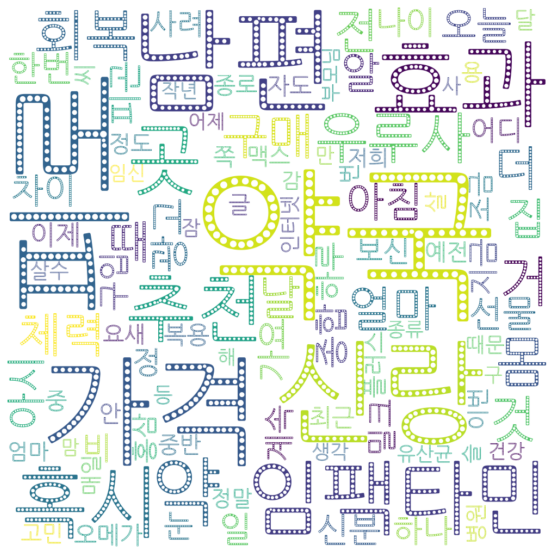

In [ ]:
wordcloud = WordCloud().generate(s)

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(c)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()